In [1]:
## R function
library(MASS)
VAR.sim=function(phi, sigma, Y0, Time){
n=dim(phi)[[1]];
res=array(NA,c(Time+1,n));
res[1,]=Y0;
for(i in 2:(Time+1))
    res[i,]=phi%*%res[i-1,] + mvrnorm(1, rep(0,n),sigma);
res=res[-1,];                          # res[-i,] removes row at index i from the table
return(res);
} 

Warning message:
"package 'MASS' was built under R version 3.6.3"

mvrnorm pulls sample from multivariate normal distribution given a covariance matrix (directional property)

In [2]:
## Model coefficients and simulation 
phi=diag(c(0.5,0.01,0.97))
sigma=array(c(4.424352e-04,6.896004e-05, 1.550325e-04, 6.896004e-05, 3.665090e-04,9.574216e-05, 1.550325e-04, 9.574216e-05, 1.421814e-04),c(3,3))
Y0=c(0.07,-0.17,-0.009) 
simulated.Data=VAR.sim(phi,sigma,Y0,1000)

# pi matrix
print(phi)
# covariance matrix of errors
print(sigma)


     [,1] [,2] [,3]
[1,]  0.5 0.00 0.00
[2,]  0.0 0.01 0.00
[3,]  0.0 0.00 0.97
             [,1]         [,2]         [,3]
[1,] 4.424352e-04 6.896004e-05 1.550325e-04
[2,] 6.896004e-05 3.665090e-04 9.574216e-05
[3,] 1.550325e-04 9.574216e-05 1.421814e-04


Note the series are granger independent:<h3> <center>Y<sub>1t</sub> = 0.5*Y<sub>1(t-1)</sub> + 𝜖<sub>1t</sub> <BR>
    Y<sub>2t</sub> = 0.01*Y<sub>2(t-1)</sub> + 𝜖<sub>2t</sub> <BR>
    Y<sub>3t</sub> = 0.97*Y<sub>3(t-1)</sub> + 𝜖<sub>3t</sub> <BR>

Now estimate same time series(s) using VAR library

In [3]:
## Fit a VAR model
library(vars)
model=VAR(simulated.Data,p=1)
summary(model)

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Warning message in VAR(simulated.Data, p = 1):
"No column names supplied in y, using: y1, y2, y3 , instead.
"


VAR Estimation Results:
Endogenous variables: y1, y2, y3 
Deterministic variables: const 
Sample size: 999 
Log Likelihood: 8357.921 
Roots of the characteristic polynomial:
0.9668 0.5078 0.04632
Call:
VAR(y = simulated.Data, p = 1)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + y3.l1 + const 

        Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.5077778  0.0283311  17.923   <2e-16 ***
y2.l1 -0.0418967  0.0356724  -1.174   0.2405    
y3.l1 -0.0065774  0.0153880  -0.427   0.6692    
const  0.0013997  0.0006686   2.093   0.0366 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.0207 on 995 degrees of freedom
Multiple R-Squared: 0.253,	Adjusted R-squared: 0.2508 
F-statistic: 112.3 on 3 and 995 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + y3.l1 + const 

        Estimate Std. Error t value Pr(>|t|)
y1.l1 -0.0034027  0.0254716  -0.134    0.894
y2.l1 -0.0461904  0.0320719  -1.440    0

<H3> ANALYSIS

For Y<sub> 1t </sub>: <br>
Simulated Coefficients: 𝜋_11=0.5; 𝜋_12=0; 𝜋_13=0 <br>
Estimated Coefficients: 𝜋 ̂_11=0.50;𝜋 ̂_12=-0.04;𝜋 ̂_13=0.00  <br>
𝜋_12 & 𝜋_13 not statistically significant at the significance level 0.05
<br> <br>
Also note the simulated covariance matrix is close to specified in simulation.

#  CHECK ALL BELOW (UNSURE)

<h3> Test Normality of residual for individual time series.

In [4]:
model.residuals=residuals(model)
## Testing for Normality
normality.test(model)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 5.491, df = 6, p-value = 0.4825


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 4.2106, df = 3, p-value = 0.2396


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 1.2804, df = 3, p-value = 0.7338


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 5.491, df = 6, p-value = 0.4825


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 4.2106, df = 3, p-value = 0.2396


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 1.2804, df = 3, p-value = 0.7338




for JB p value is greater than 0.05 hence we accept NULL hypothesis of Normality ie along x,y,z axis (conditional distributions of multivariate gaussian f(x,y,z)) the residuals follow a gaussian dbn.

<h3>Test for heteroscedasticity of residuals

In [5]:
## Testing for heterogeneous variance 
arch.test(model)


	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 208.48, df = 180, p-value = 0.0717

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 208.48, df = 180, p-value = 0.0717



Reject null hypothesis of constant variance. there is time varying volatility or heteroscedasticity.

<h3> Test for Cross correlation ie if non diagonal covariance matrix 

In [6]:
## Residual Analysis: Uncorrelated Errors Assumption
serial.test(model)
serialtest = serial.test(model)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model
Chi-squared = 117.22, df = 135, p-value = 0.8627

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model
Chi-squared = 117.22, df = 135, p-value = 0.8627



p-value small, reject the null of uncorrelation of residuals. That is there is some evidence of directional dependency due to non diagonal covariance matrix AS IS EVIDENT from contemporarious (lag=0) cross ACFs below:

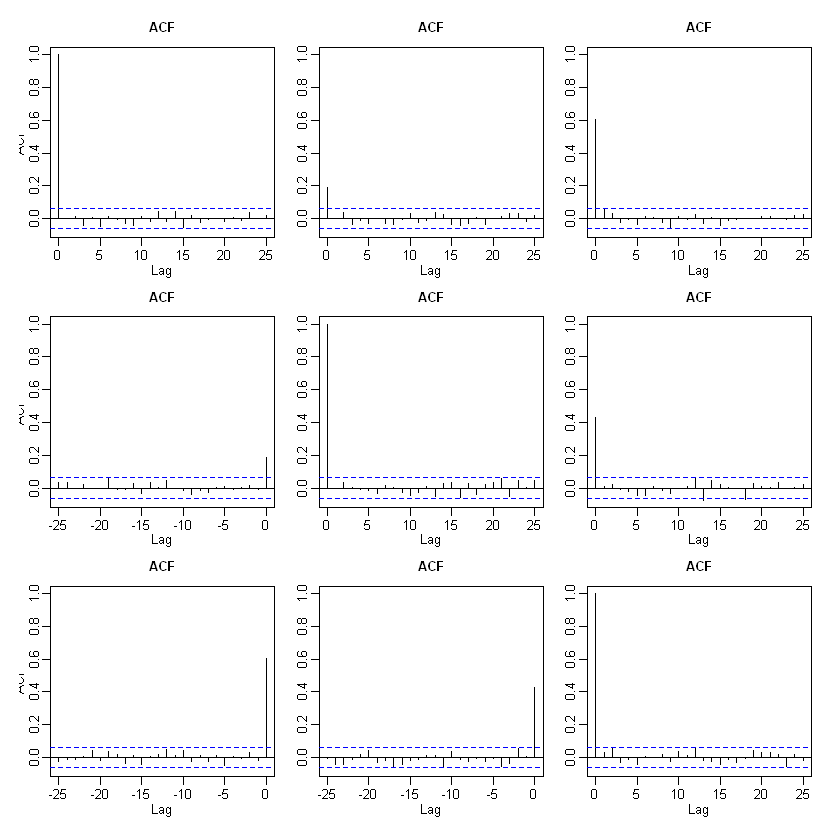

In [7]:
acf(model.residuals, main="ACF")

Note also, we can see from above, there wont be any leading/lagging series since we simulated the series that were granger independent.

<h3> Plot residual series

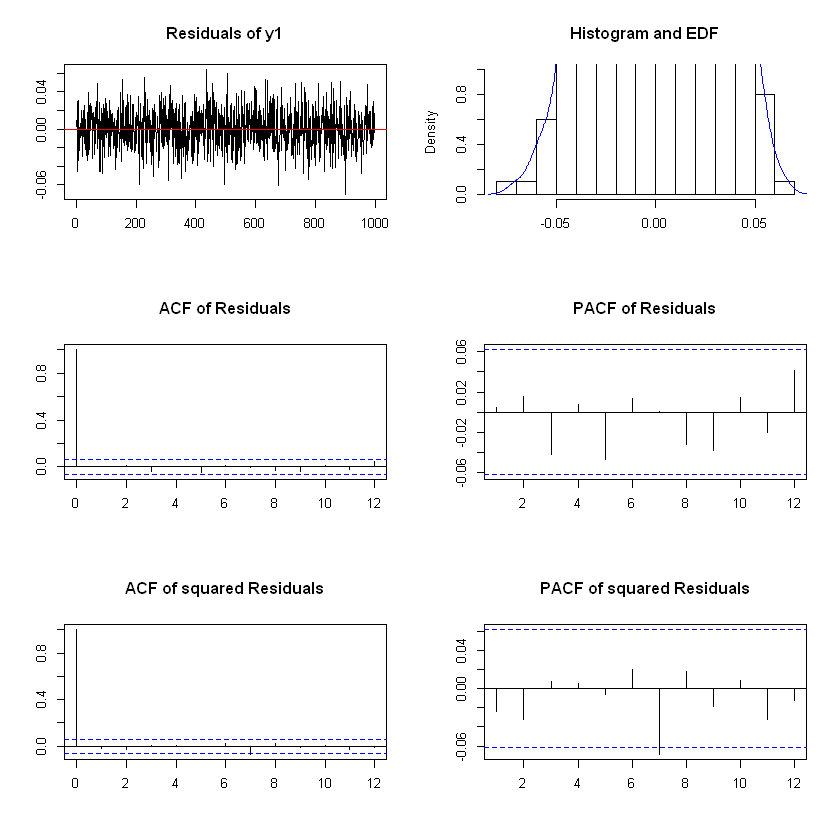

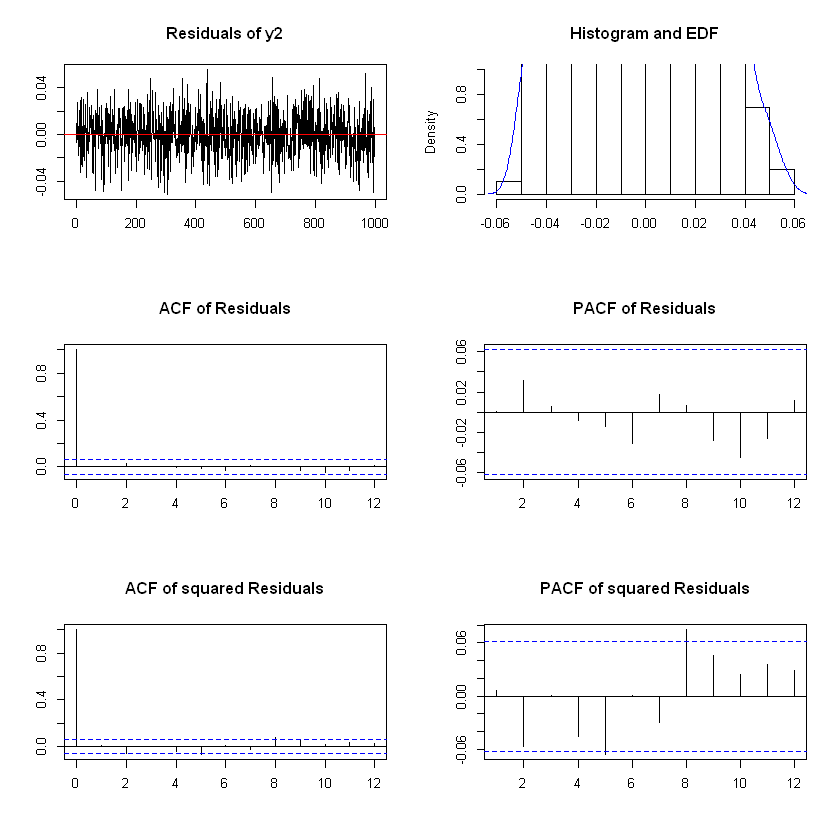

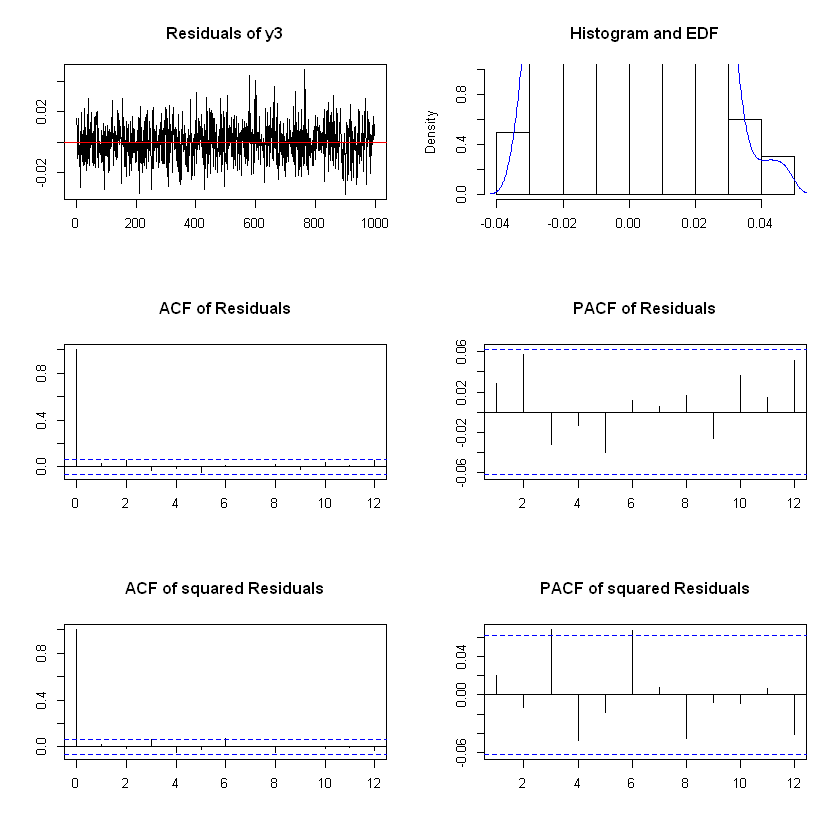

In [8]:
plot(serialtest)

Residuals will be following a normal distribution (along x, y and z directions ie conditional of the multivariate gaussian dbn) as they came from a multivariate normal distribution (we generated them from mvrnom) <br> (NOTE: multivariate noises should come from a multivariate normal distribution if our model specification is correct like the univariate case) <br> <b> Theorem </b>
A conditional distribution of gaussian multivariate is also a gaussian distribution. See below demonstration:

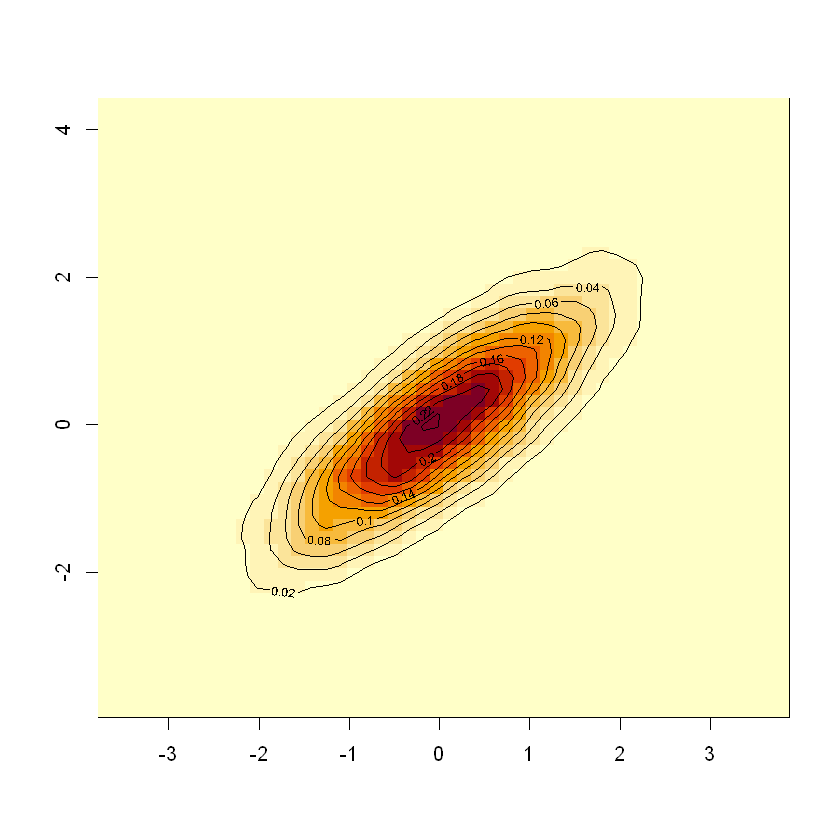

In [9]:
################EXAMPLE WITH 2x2 COVARIANCE MATRIX########################

# https://stat.ethz.ch/pipermail/r-help/2003-September/038314.html
# lets first simulate a bivariate normal sample
library(MASS)
# Simulate bivariate normal data
mu <- c(0,0)                         # Mean
Sigma <- matrix(c(1, 0.8, 0, 1), 2)  # Covariance matrix
# > Sigma
# [,1] [,2]
# [1,]  1.0  0.1
# [2,]  0.1  1.0
 
# Generate sample from N(mu, Sigma)
bivn <- mvrnorm(10000, mu = mu, Sigma = Sigma )  # from Mass package
# Calculate kernel density estimate
bivn.kde <- kde2d(bivn[,1], bivn[,2], n = 50)   # from MASS package
# Contour plot overlayed on heat map image of results
image(bivn.kde)       # from base graphics package
contour(bivn.kde, add = TRUE)     # from base graphics package

Useful for WALD/Granger test:

In [29]:
vcov(model)

,y1:(Intercept),y1:y1.l1,y1:y2.l1,y1:y3.l1,y2:(Intercept),y2:y1.l1,y2:y2.l1,y2:y3.l1,y3:(Intercept),y3:y1.l1,y3:y2.l1,y3:y3.l1
y1:(Intercept),4.470563e-07,-2.937226e-06,-2.022633e-07,1.639610e-06,7.581720e-08,-4.981301e-07,-3.430224e-08,2.780648e-07,1.556239e-07,-1.022472e-06,-7.040947e-08,5.707615e-07
y1:y1.l1,-2.937226e-06,8.026521e-04,-1.301138e-04,-9.687049e-05,-4.981301e-07,1.361234e-04,-2.206626e-05,-1.642846e-05,-1.022472e-06,2.794097e-04,-4.529366e-05,-3.372140e-05
y1:y2.l1,-2.022633e-07,-1.301138e-04,1.272518e-03,-4.706138e-05,-3.430224e-08,-2.206626e-05,2.158089e-04,-7.981235e-06,-7.040947e-08,-4.529366e-05,4.429738e-04,-1.638244e-05
y1:y3.l1,1.639610e-06,-9.687049e-05,-4.706138e-05,2.367908e-04,2.780648e-07,-1.642846e-05,-7.981235e-06,4.015784e-05,5.707615e-07,-3.372140e-05,-1.638244e-05,8.242880e-05
y2:(Intercept),7.581720e-08,-4.981301e-07,-3.430224e-08,2.780648e-07,3.613657e-07,-2.374226e-06,-1.634939e-07,1.325334e-06,9.955910e-08,-6.541179e-07,-4.504387e-08,3.651399e-07
y2:y1.l1,-4.981301e-07,1.361234e-04,-2.206626e-05,-1.642846e-05,-2.374226e-06,6.488017e-04,-1.051739e-04,-7.830259e-05,-6.541179e-07,1.787500e-04,-2.897624e-05,-2.157298e-05
y2:y2.l1,-3.430224e-08,-2.206626e-05,2.158089e-04,-7.981235e-06,-1.634939e-07,-1.051739e-04,1.028605e-03,-3.804077e-05,-4.504387e-08,-2.897624e-05,2.833888e-04,-1.048053e-05
y2:y3.l1,2.780648e-07,-1.642846e-05,-7.981235e-06,4.015784e-05,1.325334e-06,-7.830259e-05,-3.804077e-05,1.914033e-04,3.651399e-07,-2.157298e-05,-1.048053e-05,5.273314e-05
y3:(Intercept),1.556239e-07,-1.022472e-06,-7.040947e-08,5.707615e-07,9.955910e-08,-6.541179e-07,-4.504387e-08,3.651399e-07,1.496515e-07,-9.832325e-07,-6.770736e-08,5.488573e-07
y3:y1.l1,-1.022472e-06,2.794097e-04,-4.529366e-05,-3.372140e-05,-6.541179e-07,1.787500e-04,-2.897624e-05,-2.157298e-05,-9.832325e-07,2.686867e-04,-4.355542e-05,-3.242727e-05


In [30]:
 coefficients(model)

,Estimate,Std. Error,t value,Pr(>|t|)
y1.l1,0.507777765,0.0283311151,17.9229714,1.806258e-62
y2.l1,-0.041896741,0.0356723705,-1.1744872,2.404810e-01
y3.l1,-0.006577372,0.0153880095,-0.4274349,6.691551e-01
const,0.001399734,0.0006686227,2.0934588,3.656089e-02
,Estimate,Std. Error,t value,Pr(>|t|)
y1.l1,-0.0034026888,0.025471586,-0.1335876,0.8937557
y2.l1,-0.0461904020,0.032071871,-1.4402154,0.1501210
y3.l1,0.0035361488,0.013834860,0.2555970,0.7983149
const,0.0003529854,0.000601137,0.5871963,0.5572051
,Estimate,Std. Error,t value,Pr(>|t|)


In [31]:
#note here trend was not included in our VAR model
coef.y1=coefficients(model)$y1[-(4),1]
coef.y1

y1.l1        y2.l1        y3.l1 
 0.507777765 -0.041896741 -0.006577372

In [32]:
var.y1=vcov(model)[1:(2*2),1:(2*2)]
var.y1

,y1:(Intercept),y1:y1.l1,y1:y2.l1,y1:y3.l1
y1:(Intercept),4.470563e-07,-2.937226e-06,-2.022633e-07,1.639610e-06
y1:y1.l1,-2.937226e-06,8.026521e-04,-1.301138e-04,-9.687049e-05
y1:y2.l1,-2.022633e-07,-1.301138e-04,1.272518e-03,-4.706138e-05
y1:y3.l1,1.639610e-06,-9.687049e-05,-4.706138e-05,2.367908e-04
